# Data Cleaning

Data cleaning is always the first step in any data science project. Although the data here seems clean, some minor alterations are required.

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go


In [2]:

nutrients=pd.read_csv("/kaggle/input/nutrition-details-for-most-common-foods/nutrients_csvfile.csv")
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [3]:
nutrients=nutrients.replace("t",0)
nutrients=nutrients.replace("t'",0)

nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [4]:
nutrients=nutrients.replace(",","", regex=True)
nutrients['Fiber']=nutrients['Fiber'].replace("a","", regex=True)
nutrients['Calories'][91]=(8+44)/2

In [5]:
nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [6]:
nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

There's a null value in the fiber column, lets drop that row entirely.

In [8]:
nutrients=nutrients.dropna()
nutrients.shape

(331, 10)

# Data Visualization and Analysis

Let's start the analysis by plotting the features with one another. This will not only provide us the distribution of features with one another but also give a quick quantitative feel of the data.

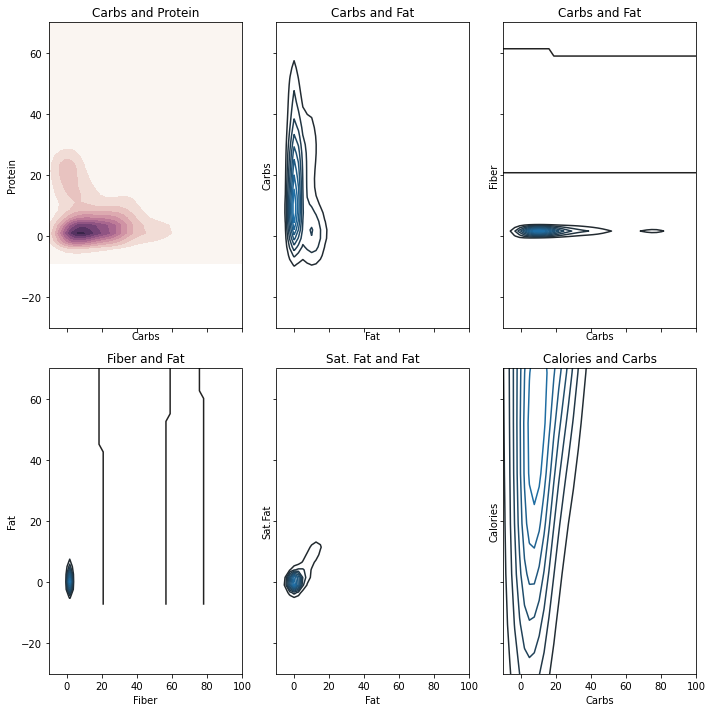

In [9]:
# Plotting the KDEplots

import matplotlib.pyplot as plt


f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

sns.kdeplot(nutrients['Carbs'],nutrients['Protein'],cmap=cmap,shade=True, ax=axes[0,0])
axes[0,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Protein')

cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)

sns.kdeplot(nutrients['Fat'],nutrients['Carbs'], ax=axes[0,1])
axes[0,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)

sns.kdeplot(nutrients['Carbs'],nutrients['Fiber'], ax=axes[0,2])
axes[0,2].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)

sns.kdeplot(nutrients['Fiber'],nutrients['Fat'], ax=axes[1,0])
axes[1,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Fiber and Fat')

cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)

sns.kdeplot(nutrients['Fat'],nutrients['Sat.Fat'], ax=axes[1,1])
axes[1,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Sat. Fat and Fat')

cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)

sns.kdeplot(nutrients['Carbs'],nutrients['Calories'], ax=axes[1,2])
axes[1,2].set(xlim=(-10, 100), ylim=(-30, 70), title = 'Calories and Carbs')

f.tight_layout()


In [10]:

alls=['Vegetables A-E',
 'Vegetables F-P',
 'Vegetables R-Z','Breads cereals fastfoodgrains','Seeds and Nuts']

prot= nutrients[nutrients['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_20=protein_rich.head(20)
fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 10 protein rich foods')
fig.show()

In the Grains, Vegetables, and Seeds group, whole wheat and white bread have the highest protein content, with soybeans also ranking within the top 20. Additionally, Almonds hold the number one spot in the Seeds category

## Foods to stay away from:

What food has the most calories?

In [11]:
cals= nutrients.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20, x='Food', y='Calories' , color='Calories',title=' Top 10 calorie rich foods')
fig.show()

Fortified milk and white bread have the highest calorie content, while whole wheat contains the most protein but has a comparable calorie count. Lard is the primary fat source with the most calories, and a half cup of ice cream leads the dessert category.

In [12]:
fats= nutrients.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()

## Analysing categories

In [13]:
category_dist=nutrients.groupby(['Category']).sum()
category_dist

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,
Breads cereals fastfoodgrains,5253,11921.0,403,207,99.0,115.91,2059.0
Dairy products,7412,8434.0,503,396,322.0,4.40,651.0
Desserts sweets,2958,6608.0,78,163,150.0,20.50,1184.0
DrinksAlcohol Beverages,3284,1112.0,0,0,0.0,0.00,167.0
Fats Oils Shortenings,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,1807,2757.0,588,338,252.0,235.00,263.0
Fruits A-F,3844,3328.0,29,20,12.0,33.50,812.0
Fruits G-P,5412,4054.0,28,25,21.0,21.10,1009.0
Fruits R-Z,1973,1228.0,7,1,0.0,17.40,330.0


In [14]:
category_dist=nutrients.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()


In analyzing the data, it becomes evident that breads, grains, and cereals stand out for their significant carbohydrate and calorie levels. Seafood boasts the highest percentage of protein, contrasting with the considerable fiber content found in both fats and seafood. Notably, seeds and nuts contain approximately 14% fat. Fruits, while not dominating any specific category, contribute approximately 10% of carbohydrates. Furthermore, dairy products (15%) exhibit a higher saturated fat content compared to seafood (11.8%)

## Analyzing the Drinks, Alcohol, Beverages and Desserts

In [15]:
drinks= nutrients[nutrients['Category'].isin(['Fish Seafood','Desserts sweets'])]
drinks_top=drinks.sort_values(by='Calories', ascending= False)
drinks_top=drinks_top.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_top['Calories'].values, text=drinks_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))



fig.show()

So, pudding has the most amount of calories followed by chocolate fudge.

In [16]:
drinks_fatty=drinks.sort_values(by='Fat', ascending= False)
drinks_fatty=drinks_fatty.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_fatty['Fat'].values, text=drinks_fatty['Food'],
                              title = { "text": "Desserts with high fat percentage"},
               marker = {"colors": ["blue", "purple", "pink", "teal", "silver","yellow", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

Pies and fudges have the highest percentage of fat as well.

## Analyzing meat, poultry , seafood.

In [17]:
meat= nutrients[nutrients['Category'].isin(['Fish Seafood','Meat Poultry'])]
meats_top=drinks.sort_values(by='Protein', ascending= False)
meats_top=meats_top.head(10)

fig = go.Figure(go.Pie(values=meats_top['Protein'].values, text=meats_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["maroon", "salmon", "tan", "gold", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

Oysters have a large amount of proteins, after them the flatfish flounders have about 6.59% protein.

## Seafood and meat always is known for having good fat content. Let's find out the fattiest of the fishes.🐟

In [18]:
top_10_fattest= meat.sort_values(by='Fat', ascending=False)
top_10_fattest=top_10_fattest.head(10)
fig = go.Figure(data=[go.Scatter(
    x=top_10_fattest['Food'], y=top_10_fattest['Fat'],
    mode='markers',
    marker_size=[200,180,160,140,120, 100 ,80 , 60 ,40,20])
])
fig.update_layout(title='Meat/Seafood with high Fat Content')
fig.show()

So, only have high protein as well as high fat percentage. Pork sausages are the second highest followed by Roast beef. Also, no type of fish is present in the top 10 fattiest meats list. So, fishes tend to have less fat, I suppose.

## Lastly, let us find the meat with most fiber

In [19]:
top_10_fibrous= meat.sort_values(by='Fiber', ascending=False)
top_10_fibrous=top_10_fibrous.head(10)
top_10_fibrous

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,Oysters,6-8 med.,230,231.0,232,233,234.0,235.0,236.0,Fish Seafood
43,Bacon,2 slices,16,95.0,4,8,7.0,0.0,1.0,Meat Poultry
78,Halibut,3 1/2 oz.,100,182.0,26,8,0.0,0.0,0.0,Fish Seafood
69,Turkey,3 1/2 oz.,100,265.0,27,15,0.0,0.0,0.0,Meat Poultry
70,Veal,3 oz.,85,185.0,23,9,8.0,0.0,0.0,Meat Poultry
71,Roast,3 oz.,85,305.0,13,14,13.0,0.0,0.0,Meat Poultry
72,Clams,3 oz.,85,87.0,12,1,0.0,0.0,2.0,Fish Seafood
73,Cod,3 1/2 oz.,100,170.0,28,5,0.0,0.0,0.0,Fish Seafood
74,Crab meat,3 oz.,85,90.0,14,2,0.0,0.0,1.0,Fish Seafood
75,Fish sticks fried,5,112,200.0,19,10,5.0,0.0,8.0,Fish Seafood


Bacon, Halibut, Turkey and veal top the charts in terms of Fiber content.